This script reads in all Level 0 files for eta Car between scans 3801 and 3994. It then sorts the files by its UNIX time stamp and determines the positions observed at either end of a strip.  This info is logged and then plotted onto a DSS map of the region.

The purpose is to determine which potential reference spectra (end of strip spectra) have contaminating emission.

The script hat created the initial list has been moved to the end of the notebook (and the saving instruction has been commented out) to prohibit accidental overwriting.

The position information data can be created using the code in the last code cell.

and are stored in: 
./Data/processed/eta_carinae_obs_positions_3801-3995_all_v3.npz

<IPython.core.display.Javascript object>


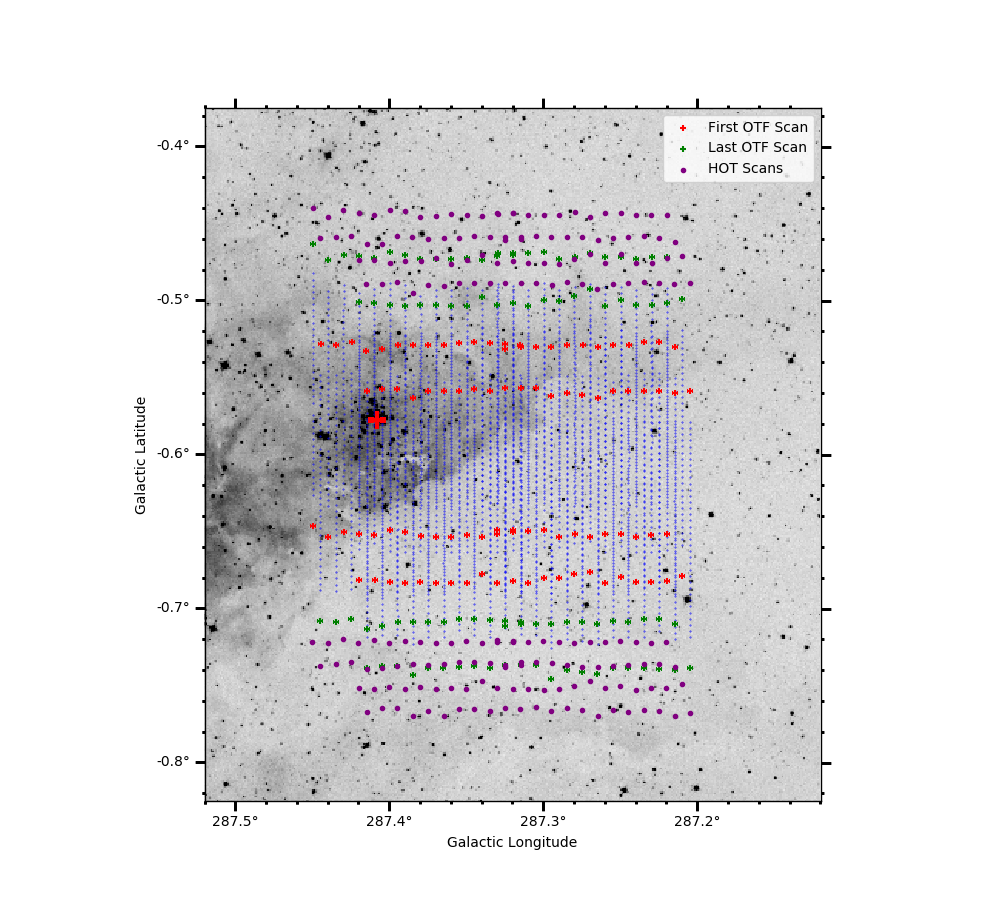

INFO: Auto-setting vmin to  2.607e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.654e+04 [aplpy.core]
INFO: Auto-setting resolution to 64.9351 dpi [aplpy.core]
./Data/processed/eta_carinae_obs_positions_3801-3995_all_v4_w_hots.pdf


In [49]:
%matplotlib nbagg
import aplpy
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

mpl.rcParams['mathtext.fontset']=r'custom'


ifile = './Data/DSS/eta_carinae_3deg.fits'
f = aplpy.FITSFigure(ifile)

# f.recenter(287.48,-0.62,width=0.45,height=0.32)
f.recenter(287.32,-0.6,width=0.4,height=0.45)

f.show_grayscale()

# f.add_colorbar()
# f.colorbar.set_location('right')
# f.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
# f.colorbar.set_pad(0.03)  # arbitrary units, default is 0.05

#f.ticks.set_color('black')
f.ticks.set_linewidth(2)  # points
f.ticks.set_length(10)  # points
f.tick_labels.set_xformat('ddd.d')
f.tick_labels.set_yformat('ddd.d')


sto2_plot_path = './Data/processed/'
odfile = './Data/processed/eta_carinae_obs_positions_3801-3995_all_v3.npz'

idat = np.load(odfile)

gl = idat['gl']   
gb = idat['gb']   
gl0 = idat['gl0']   
gb0 = idat['gb0']   
gl1 = idat['gl1']   
gb1 = idat['gb1']   
gl2 = idat['gl2']   
gb2 = idat['gb2']   
gl3 = idat['gl3']   
gb3 = idat['gb3']   
gl4 = idat['gl4']   
gb4 = idat['gb4']   
gl5 = idat['gl5']   
gb5 = idat['gb5']   
gl6 = idat['gl6']   
gb6 = idat['gb6']   
gl7 = idat['gl7']   
gb7 = idat['gb7']   
gl8 = idat['gl8']   
gb8 = idat['gb8']   
gl9 = idat['gl9']   
gb9 = idat['gb9']   
scan0 = idat['scan0']
obsid0 = idat['obsid0']
hgl = idat['hglall']   
hgb = idat['hgball']   
hscan  = idat['hscan']
hobsid = idat['hobsid']


f.show_markers(gl, gb, marker='.', facecolor='blue', edgecolor='blue',s=0.5) #, linewidth=3.0, s=50.0)
ocol = ['red', 'orange', 'purple', 'green', 'yellowgreen', 'olive']
sz = 6
f.show_markers(gl0, gb0, marker='+', facecolor=ocol[0], edgecolor=ocol[0],s=3*sz, label='First OTF Scan') #, linewidth=3.0, s=50.0)
#f.show_markers(gl1, gb1, marker='o', facecolor=ocol[1], edgecolor=ocol[1],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl2, gb2, marker='v', facecolor=ocol[2], edgecolor=ocol[2],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl3, gb3, marker='D', facecolor=ocol[1], edgecolor=ocol[1],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl4, gb4, marker='^', facecolor=ocol[2], edgecolor=ocol[2],s=sz) #, linewidth=3.0, s=50.0)

f.show_markers(gl9, gb9, marker='+', facecolor=ocol[3], edgecolor=ocol[3],s=3*sz, label='Last OTF Scan') #, linewidth=3.0, s=50.0)
#f.show_markers(gl8, gb8, marker='o', facecolor=ocol[4], edgecolor=ocol[4],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl7, gb7, marker='v', facecolor=ocol[5], edgecolor=ocol[5],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl6, gb6, marker='D', facecolor=ocol[4], edgecolor=ocol[4],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl5, gb5, marker='^', facecolor=ocol[5], edgecolor=ocol[5],s=sz) #, linewidth=3.0, s=50.0)

f.show_markers(hgl, hgb, marker='o', facecolor=ocol[2], edgecolor=ocol[2],s=1.5*sz, label='HOT Scans') #, linewidth=3.0, s=50.0)


#f.show_markers(1.03, 0.086, marker='+', facecolor=ocol[0], edgecolor=ocol[0],s=3*sz, transform=plt.gca().transAxes, clip_on=False) 
f.show_markers(1.03, 0.086, marker='+', facecolor=ocol[0], edgecolor=ocol[0],s=3*sz, clip_on=False) 
#plt.text(1.05, 0.85,r'$\plus$ ObsID  0', ha='left', va='top', size=8, color=ocol[0], transform=plt.gca().transAxes)
#plt.text(1.05, 0.85,r'$\plus$ First OTF Scan', ha='left', va='top', size=8, color=ocol[0], transform=plt.gca().transAxes)
# f.show_markers(1.03, 0.083, marker='o', facecolor=ocol[1], edgecolor=ocol[1],s=2*sz, transform=plt.gca().transAxes, clip_on=False) 
# plt.text(1.05, 0.82,r'$\bigcirc$ ObsID  1', ha='left', va='top', size=8, color=ocol[1], transform=plt.gca().transAxes)
# f.show_markers(1.03, 0.080, marker='v', facecolor=ocol[2], edgecolor=ocol[2],s=2*sz, transform=plt.gca().transAxes, clip_on=False) 
# plt.text(1.05, 0.79,r'$\bigtriangledown$ ObsID  2', ha='left', va='top', size=8, color=ocol[2], transform=plt.gca().transAxes)
# f.show_markers(1.03, 0.077, marker='v', facecolor=ocol[3], edgecolor=ocol[5],s=2*sz, transform=plt.gca().transAxes, clip_on=False) 
# plt.text(1.05, 0.76,r'$\bigtriangledown$ ObsID -3', ha='left', va='top', size=8, color=ocol[5], transform=plt.gca().transAxes)
# f.show_markers(1.03, 0.074, marker='o', facecolor=ocol[4], edgecolor=ocol[4],s=2*sz, transform=plt.gca().transAxes, clip_on=False) 
# plt.text(1.05, 0.73,r'$\bigcirc$ ObsID -2', ha='left', va='top', size=8, color=ocol[4], transform=plt.gca().transAxes)
#f.show_markers(1.03, 0.071, marker='+', facecolor=ocol[5], edgecolor=ocol[3],s=2*sz, transform=plt.gca().transAxes, clip_on=False) 
#plt.text(1.05, 0.70,r'$\plus$ ObsID -1', ha='left', va='top', size=8, color=ocol[3], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.083, marker='+', facecolor=ocol[5], edgecolor=ocol[3],s=3*sz, clip_on=False) 
#plt.text(1.05, 0.82,r'$\plus$ Last OTF Scan', ha='left', va='top', size=8, color=ocol[3], transform=plt.gca().transAxes)
#plt.text(1.05, 0.79,r'$\bullet$ HOT Scans', ha='left', va='top', size=8, color=ocol[2], transform=plt.gca().transAxes)

tr14 = SkyCoord('10h43m56s','−59d33m00s', frame='icrs')
tr14g = tr14.galactic
f.show_markers(tr14g.l.deg, tr14g.b.deg, marker='+', facecolor='red', edgecolor='red', linewidth=3.0, s=150.0)
#f.add_label(tr14g.l.deg, tr14g.b.deg+0.015, 'Trumpler 14', ha='left', color='red', size=18, weight='extra bold')

plt.legend()

# now the labels
# for i in range(len(scan0)):
#     if gb0[i]<-0.6: 
#         off = -0.1 - i%6 * 0.005
#     else: 
#         off = 0.1 + i%6 * 0.005
#     ostr = '%s_%s'%(scan0[i], obsid0[i])
#     if ((gl0[i]<287.6)&(gl0[i]>287.1)&(gb0[i]<-0.35)&(gb0[i]>-0.85)):
#         f.add_label(gl0[i], gb0[i]+off, ostr, size=4, horizontalalignment='left', verticalalignment='center')
#     #print('%5s %5s   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f'%(scan0[i], obsid0[i], gl0[i], gb0[i], gl1[i], gb1[i], gl2[i], gb2[i], gl7[i], gb7[i], gl8[i], gb8[i], gl9[i], gb9[i]))
        
f.set_theme('publication')

ofile = sto2_plot_path+'eta_carinae_obs_positions_3801-3995_all_v4_w_hots.pdf'

f.save(ofile)
print(ofile)

<IPython.core.display.Javascript object>


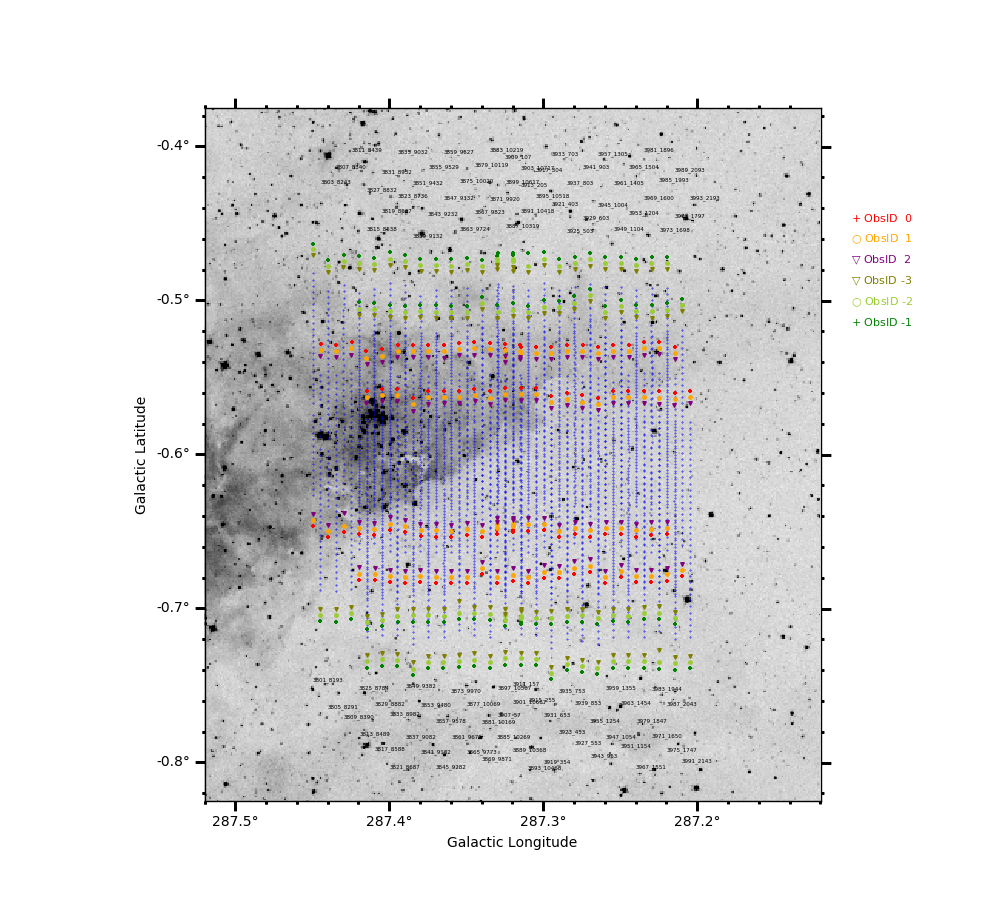

INFO: Auto-setting vmin to  2.581e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.696e+04 [aplpy.core]
INFO: Auto-setting resolution to 64.9351 dpi [aplpy.core]
./Data/plots/eta_carinae_obs_positions_3801-3995_all_.pdf


In [50]:
# print('Coverage:')
# print('l: ', cl.min(), cl.max())
# print('b: ', cb.min(), cb.max())

import aplpy
import matplotlib as mpl
import numpy as np

mpl.rcParams['mathtext.fontset']=r'custom'

ifile = './Data/DSS/eta_carinae_3deg.fits'
f = aplpy.FITSFigure(ifile)

f.recenter(287.32,-0.6,width=0.4,height=0.45)

f.show_grayscale()

# f.add_colorbar()
# f.colorbar.set_location('right')
# f.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
# f.colorbar.set_pad(0.03)  # arbitrary units, default is 0.05

#f.ticks.set_color('black')
f.ticks.set_linewidth(2)  # points
f.ticks.set_length(10)  # points
f.tick_labels.set_xformat('ddd.d')
f.tick_labels.set_yformat('ddd.d')



sto2_plot_path = './Data/processed/'
odfile = './Data/processed/eta_carinae_obs_positions_3801-3995_all_v3.npz'

idat = np.load(odfile)
gl = idat['gl']   
gb = idat['gb']   
gl0 = idat['gl0']   
gb0 = idat['gb0']   
gl1 = idat['gl1']   
gb1 = idat['gb1']   
gl2 = idat['gl2']   
gb2 = idat['gb2']   
gl3 = idat['gl3']   
gb3 = idat['gb3']   
gl4 = idat['gl4']   
gb4 = idat['gb4']   
gl5 = idat['gl5']   
gb5 = idat['gb5']   
gl6 = idat['gl6']   
gb6 = idat['gb6']   
gl7 = idat['gl7']   
gb7 = idat['gb7']   
gl8 = idat['gl8']   
gb8 = idat['gb8']   
gl9 = idat['gl9']   
gb9 = idat['gb9']   
scan0 = idat['scan0']
obsid0 = idat['obsid0']

f.show_markers(gl, gb, marker='.', facecolor='blue', edgecolor='blue',s=0.5) #, linewidth=3.0, s=50.0)
ocol = ['red', 'orange', 'purple', 'green', 'yellowgreen', 'olive']
sz = 6
f.show_markers(gl0, gb0, marker='+', facecolor=ocol[0], edgecolor=ocol[0],s=2*sz) #, linewidth=3.0, s=50.0)
f.show_markers(gl1, gb1, marker='o', facecolor=ocol[1], edgecolor=ocol[1],s=sz) #, linewidth=3.0, s=50.0)
f.show_markers(gl2, gb2, marker='v', facecolor=ocol[2], edgecolor=ocol[2],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl3, gb3, marker='D', facecolor=ocol[1], edgecolor=ocol[1],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl4, gb4, marker='^', facecolor=ocol[2], edgecolor=ocol[2],s=sz) #, linewidth=3.0, s=50.0)

f.show_markers(gl9, gb9, marker='+', facecolor=ocol[3], edgecolor=ocol[3],s=2*sz) #, linewidth=3.0, s=50.0)
f.show_markers(gl8, gb8, marker='o', facecolor=ocol[4], edgecolor=ocol[4],s=sz) #, linewidth=3.0, s=50.0)
f.show_markers(gl7, gb7, marker='v', facecolor=ocol[5], edgecolor=ocol[5],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl6, gb6, marker='D', facecolor=ocol[4], edgecolor=ocol[4],s=sz) #, linewidth=3.0, s=50.0)
#f.show_markers(gl5, gb5, marker='^', facecolor=ocol[5], edgecolor=ocol[5],s=sz) #, linewidth=3.0, s=50.0)

f.show_markers(1.03, 0.086, marker='+', facecolor=ocol[0], edgecolor=ocol[0],s=2*sz, clip_on=False) 
plt.text(1.05, 0.85,r'$\plus$ ObsID  0', ha='left', va='top', size=8, color=ocol[0], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.083, marker='o', facecolor=ocol[1], edgecolor=ocol[1],s=2*sz, clip_on=False) 
plt.text(1.05, 0.82,r'$\bigcirc$ ObsID  1', ha='left', va='top', size=8, color=ocol[1], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.080, marker='v', facecolor=ocol[2], edgecolor=ocol[2],s=2*sz, clip_on=False) 
plt.text(1.05, 0.79,r'$\bigtriangledown$ ObsID  2', ha='left', va='top', size=8, color=ocol[2], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.077, marker='v', facecolor=ocol[3], edgecolor=ocol[5],s=2*sz, clip_on=False) 
plt.text(1.05, 0.76,r'$\bigtriangledown$ ObsID -3', ha='left', va='top', size=8, color=ocol[5], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.074, marker='o', facecolor=ocol[4], edgecolor=ocol[4],s=2*sz, clip_on=False) 
plt.text(1.05, 0.73,r'$\bigcirc$ ObsID -2', ha='left', va='top', size=8, color=ocol[4], transform=plt.gca().transAxes)
f.show_markers(1.03, 0.071, marker='+', facecolor=ocol[5], edgecolor=ocol[3],s=2*sz, clip_on=False) 
plt.text(1.05, 0.70,r'$\plus$ ObsID -1', ha='left', va='top', size=8, color=ocol[3], transform=plt.gca().transAxes)


# now the labels
for i in range(len(scan0)):
    if gb0[i]<-0.6: 
        off = -0.1 - i%6 * 0.005
    else: 
        off = 0.1 + i%6 * 0.005
    ostr = '%s_%s'%(scan0[i], obsid0[i])
    if ((gl0[i]<287.6)&(gl0[i]>287.1)&(gb0[i]<-0.35)&(gb0[i]>-0.85)):
        f.add_label(gl0[i], gb0[i]+off, ostr, size=4, horizontalalignment='left', verticalalignment='center')
    #print('%5s %5s   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f   %.2f %.2f'%(scan0[i], obsid0[i], gl0[i], gb0[i], gl1[i], gb1[i], gl2[i], gb2[i], gl7[i], gb7[i], gl8[i], gb8[i], gl9[i], gb9[i]))
        
f.set_theme('publication')

sto2_plot_path = './Data/plots/'
ofile = sto2_plot_path+'eta_carinae_obs_positions_3801-3995_all_.pdf'

f.save(ofile)
print(ofile)

In [48]:
from astropy.utils.console import ProgressBar
import os
import glob
import sys
from STO2_v35 import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sto2_path = './Data/Level0.7vp36/'

isc = np.recarray((97,), dtype=[('scan', 'i4'),('flag', 'i1')])
ic = np.arange(3801,3994,2)
isc.scan = ic
isc.flag = 0
isc.flag[np.where(isc.scan==3905)]=1
testarray = isc.scan[np.where(isc.flag==0)]


gl = []
gb = []
glall = []
gball = []
hglall = []
hgball = []
gl0 = []
gb0 = []
gl1 = []
gb1 = []
gl2 = []
gb2 = []
gl3 = []
gb3 = []
gl4 = []
gb4 = []
gl5 = []
gb5 = []
gl6 = []
gb6 = []
gl7 = []
gb7 = []
gl8 = []
gb8 = []
gl9 = []
gb9 = []
scan0 = []
obsid0 = []
scan1 = []
obsid1 = []
scan2 = []
obsid2 = []
scan3 = []
obsid3 = []
scan4 = []
obsid4 = []
scan5 = []
obsid5 = []
scan6 = []
obsid6 = []
scan7 = []
obsid7 = []
scan8 = []
obsid8 = []
scan9 = []
obsid9 = []
hscan = []
hobsid = []

cnt = 0
for itestscan in ProgressBar(testarray, ipython_widget=True):
    ################################
    dirnum = itestscan
    cdirnum = '%05i'%(dirnum)
    cdirnum1 = '%05i'%(dirnum-1)
    cdirnum2 = '%05i'%(dirnum+1)

    sname = os.path.join(sto2_path,cdirnum,'*OTF*.fits')
    afiles = glob.glob(sname)
    n_afiles = len(afiles)
    afiles = np.array(afiles)
    print(dirnum, n_afiles)

    hname = os.path.join(sto2_path,cdirnum,'*HOT*.fits')
    hfiles = glob.glob(hname)
    n_hfiles = len(hfiles)

    # get all the files for a single OTF strip scan
    nname = os.path.join(sto2_path,cdirnum1,'*.fits')
    nfiles = glob.glob(nname)
    n_nfiles = len(nfiles)

    # get all the files for a single OTF strip scan
    pname = os.path.join(sto2_path,cdirnum2,'*.fits')
    pfiles = glob.glob(pname)
    n_pfiles = len(pfiles)

    try:
        for i in range(n_hfiles):
            hvv, hspec, hpos, hh1 = readSTO2Line(hfiles[i], 2, verbose=False)
            hglall.append(hpos.galactic.l.degree)
            hgball.append(hpos.galactic.b.degree)
            hscan.append(hh1['SCAN'])
            hobsid.append(hh1['OBSID'])
    except: pass
    
    # sort the afiles list by time
    time = []
    for i in range(n_afiles):
            svv, spec, spos, sh1 = readSTO2Line(afiles[i], 2, verbose=False)
            time.append(float(sh1['UNIXTIME']))
    nf_order = np.argsort(time)
    nafiles = afiles[nf_order]
    
    for i in range(n_afiles):

        svv, spec, spos, sh1 = readSTO2Line(nafiles[i], 2, verbose=False)
            
        if i==0:
            gl0.append(spos.galactic.l.degree)
            gb0.append(spos.galactic.b.degree)  
            scan0.append(sh1['SCAN'])
            obsid0.append(sh1['OBSID'])
        elif i==1:
            gl1.append(spos.galactic.l.degree)
            gb1.append(spos.galactic.b.degree)  
            scan1.append(sh1['SCAN'])
            obsid1.append(sh1['OBSID'])
        elif i==2:
            gl2.append(spos.galactic.l.degree)
            gb2.append(spos.galactic.b.degree)  
            scan2.append(sh1['SCAN'])
            obsid2.append(sh1['OBSID'])
        elif i==3:
            gl3.append(spos.galactic.l.degree)
            gb3.append(spos.galactic.b.degree)  
            scan3.append(sh1['SCAN'])
            obsid3.append(sh1['OBSID'])
        elif i==4:
            gl4.append(spos.galactic.l.degree)
            gb4.append(spos.galactic.b.degree)  
            scan4.append(sh1['SCAN'])
            obsid4.append(sh1['OBSID'])
        elif i==n_afiles-5:
            gl5.append(spos.galactic.l.degree)
            gb5.append(spos.galactic.b.degree)  
            scan5.append(sh1['SCAN'])
            obsid5.append(sh1['OBSID'])
        elif i==n_afiles-4:
            gl6.append(spos.galactic.l.degree)
            gb6.append(spos.galactic.b.degree)  
            scan6.append(sh1['SCAN'])
            obsid6.append(sh1['OBSID'])
        elif i==n_afiles-3:
            gl7.append(spos.galactic.l.degree)
            gb7.append(spos.galactic.b.degree)  
            scan7.append(sh1['SCAN'])
            obsid7.append(sh1['OBSID'])
        elif i==n_afiles-2:
            gl8.append(spos.galactic.l.degree)
            gb8.append(spos.galactic.b.degree)  
            scan8.append(sh1['SCAN'])
            obsid8.append(sh1['OBSID'])
        elif i==n_afiles-1:
            gl9.append(spos.galactic.l.degree)
            gb9.append(spos.galactic.b.degree)  
            scan9.append(sh1['SCAN'])
            obsid9.append(sh1['OBSID'])
        else:
            gl.append(spos.galactic.l.degree)
            gb.append(spos.galactic.b.degree)

        glall.append(spos.galactic.l.degree)
        gball.append(spos.galactic.b.degree)
    k = cnt

    print('%5s %5s   %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f  %5s %.3f %.4f'%(
        scan0[k], obsid0[k], gl0[k], gb0[k], obsid1[k], gl1[k], gb1[k], obsid2[k], gl2[k], gb2[k], obsid3[k], gl3[k], gb3[k], obsid4[k], gl4[k], gb4[k], 
        obsid5[k], gl5[k], gb5[k], obsid6[k], gl6[k], gb6[k], obsid7[k], gl7[k], gb7[k], obsid8[k], gl8[k], gb8[k], obsid9[k], gl9[k], gb9[k]))

    cnt += 1



gl = np.array(gl, dtype=np.float)
gb = np.array(gb, dtype=np.float)
glall = np.array(glall, dtype=np.float)
gball = np.array(gball, dtype=np.float)
gl0 = np.array(gl0, dtype=np.float)
gb0 = np.array(gb0, dtype=np.float)
gl1 = np.array(gl1, dtype=np.float)
gb1 = np.array(gb1, dtype=np.float)
gl2 = np.array(gl2, dtype=np.float)
gb2 = np.array(gb2, dtype=np.float)
gl3 = np.array(gl3, dtype=np.float)
gb3 = np.array(gb3, dtype=np.float)
gl4 = np.array(gl4, dtype=np.float)
gb4 = np.array(gb4, dtype=np.float)
gl5 = np.array(gl5, dtype=np.float)
gb5 = np.array(gb5, dtype=np.float)
gl6 = np.array(gl6, dtype=np.float)
gb6 = np.array(gb6, dtype=np.float)
gl7 = np.array(gl7, dtype=np.float)
gb7 = np.array(gb7, dtype=np.float)
gl8 = np.array(gl8, dtype=np.float)
gb8 = np.array(gb8, dtype=np.float)
gl9 = np.array(gl9, dtype=np.float)
gb9 = np.array(gb9, dtype=np.float)
hglall = np.array(hglall, dtype=np.float)
hgball = np.array(hgball, dtype=np.float)


sto2_plot_path = './Data/processed/'
odfile = sto2_plot_path+'eta_carinae_obs_positions_3801-3995_all_v3.npz'

np.savez(odfile, gl=gl, gb=gb, gl0=gl0, gb0=gb0, gl1=gl1, gb1=gb1, gl2=gl2, gb2=gb2, gl3=gl3, gb3=gb3, gl4=gl4, gb4=gb4, 
         gl5=gl5, gb5=gb5, gl6=gl6, gb6=gb6, gl7=gl7, gb7=gb7, gl8=gl8, gb8=gb8, gl9=gl9, gb9=gb9, 
         glall=glall, gball=gball, scan0=scan0, obsid0=obsid0, 
         hglall=hglall, hgball=hgball, hscan=hscan, hobsid=hobsid)

print('data saved in: ', odfile)


FloatProgress(value=0.0)

46 3801
 3801  8193   287.450 -0.6465   8194 287.450 -0.6424   8195 287.450 -0.6384   8196 287.450 -0.6344   8197 287.450 -0.6305   8234 287.450 -0.4784   8235 287.450 -0.4744   8236 287.450 -0.4705   8237 287.450 -0.4665   8238 287.450 -0.4630
44 3803
 3803  8243   287.445 -0.5283   8244 287.445 -0.5322   8245 287.445 -0.5362   8246 287.445 -0.5403   8247 287.445 -0.5442   8282 287.445 -0.6921   8283 287.445 -0.6961   8284 287.445 -0.7001   8285 287.445 -0.7041   8286 287.445 -0.7081
45 3805
 3805  8291   287.440 -0.6538   8292 287.440 -0.6497   8293 287.440 -0.6458   8294 287.440 -0.6418   8295 287.440 -0.6377   8331 287.440 -0.4897   8332 287.440 -0.4857   8333 287.440 -0.4817   8334 287.440 -0.4777   8335 287.440 -0.4737
46 3807
 3807  8340   287.435 -0.5287   8341 287.435 -0.5327   8342 287.435 -0.5368   8343 287.435 -0.5408   8344 287.435 -0.5448   8381 287.435 -0.6925   8382 287.435 -0.6965   8383 287.435 -0.7005   8384 287.435 -0.7045   8385 287.435 -0.7085
45 3809
 3809  8390 

 3869  9871   287.340 -0.6779   9872 287.340 -0.6738   9873 287.340 -0.6698   9874 287.340 -0.6657   9875 287.340 -0.6577   9911 287.340 -0.5137   9912 287.340 -0.5097   9913 287.340 -0.5057   9914 287.340 -0.5017   9915 287.340 -0.4977
46 3871
 3871  9920   287.335 -0.5590   9921 287.335 -0.5630   9922 287.335 -0.5670   9923 287.335 -0.5710   9924 287.335 -0.5750   9961 287.335 -0.7228   9962 287.335 -0.7268   9963 287.335 -0.7308   9964 287.335 -0.7347   9965 287.335 -0.7386
46 3873
 3873  9970   287.360 -0.6537   9971 287.360 -0.6497   9972 287.360 -0.6457   9973 287.360 -0.6417   9974 287.360 -0.6376  10011 287.360 -0.4894  10012 287.360 -0.4854  10013 287.360 -0.4814  10014 287.360 -0.4773  10015 287.360 -0.4734
45 3875
 3875 10020   287.355 -0.5275  10021 287.355 -0.5315  10022 287.355 -0.5355  10023 287.355 -0.5395  10024 287.355 -0.5435  10060 287.355 -0.6871  10061 287.355 -0.6911  10062 287.355 -0.6951  10063 287.355 -0.7031  10064 287.355 -0.7071
46 3877
 3877 10069   287.35

 3939   853   287.280 -0.6516    854 287.280 -0.6476    855 287.280 -0.6436    856 287.280 -0.6396    857 287.280 -0.6356    894 287.280 -0.4875    895 287.280 -0.4835    896 287.280 -0.4795    897 287.280 -0.4754    898 287.280 -0.4715
46 3941
 3941   903   287.275 -0.5287    904 287.275 -0.5327    905 287.275 -0.5368    906 287.275 -0.5408    907 287.275 -0.5448    944 287.275 -0.6925    945 287.275 -0.6965    946 287.275 -0.7006    947 287.275 -0.7045    948 287.275 -0.7086
47 3943
 3943   953   287.270 -0.6761    954 287.270 -0.6721    955 287.270 -0.6680    956 287.270 -0.6640    957 287.270 -0.6601    995 287.270 -0.5081    996 287.270 -0.5042    997 287.270 -0.5002    998 287.270 -0.4962    999 287.270 -0.4924
46 3945
 3945  1004   287.265 -0.5631   1005 287.265 -0.5671   1006 287.265 -0.5711   1007 287.265 -0.5750   1008 287.265 -0.5790   1045 287.265 -0.7269   1046 287.265 -0.7309   1047 287.265 -0.7349   1048 287.265 -0.7388   1049 287.265 -0.7428
46 3947
 3947  1054   287.26